<a href="https://colab.research.google.com/github/Subhashree2016/etl_llm_repository/blob/main/metrics/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Evaluation metrics for BERT model

# BERT Model - Training and Validation Loss Over Epochs for small, medium and large datasets

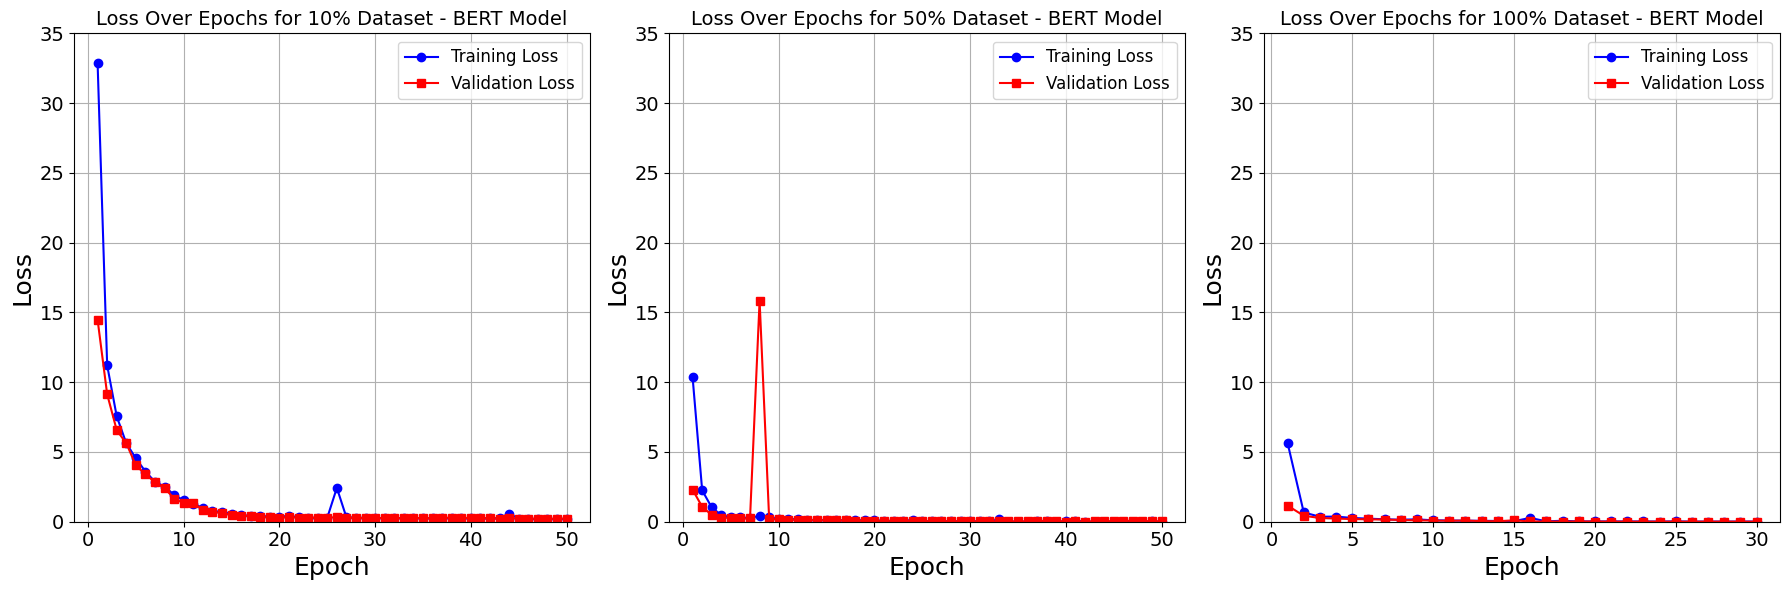

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the metrics from the saved CSV files
csv_files = [
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_small.csv',
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_medium.csv',
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_large.csv'
]

# Dataset sizes
dataset_sizes = ['10%', '50%', '100%']

# Create subplots for each CSV file
fig, axs = plt.subplots(1, len(csv_files), figsize=(18, 6))

for i, csv_path in enumerate(csv_files):
    metrics_df = pd.read_csv(csv_path)
    epochs = metrics_df['epoch'].tolist()
    train_loss_values = metrics_df['train_loss'].tolist()
    val_loss_values = metrics_df['val_loss'].tolist()

    axs[i].plot(epochs, train_loss_values, marker='o', linestyle='-', color='blue', label='Training Loss')
    axs[i].plot(epochs, val_loss_values, marker='s', linestyle='-', color='red', label='Validation Loss')

    # Set title and labels with larger font sizes
    axs[i].set_title(f'Loss Over Epochs for {dataset_sizes[i]} Dataset - BERT Model', fontsize=14)
    axs[i].set_xlabel('Epoch', fontsize=18)
    axs[i].set_ylabel('Loss', fontsize=18)
    axs[i].tick_params(axis='both', which='major', labelsize=14)

    # Set y-axis limits (adjust as needed)
    axs[i].set_ylim(0, 35)  # Set y-axis limits


    axs[i].grid(True)


    axs[i].legend(fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


# BERT Model - Validation Accuracy Over Epochs for datasets

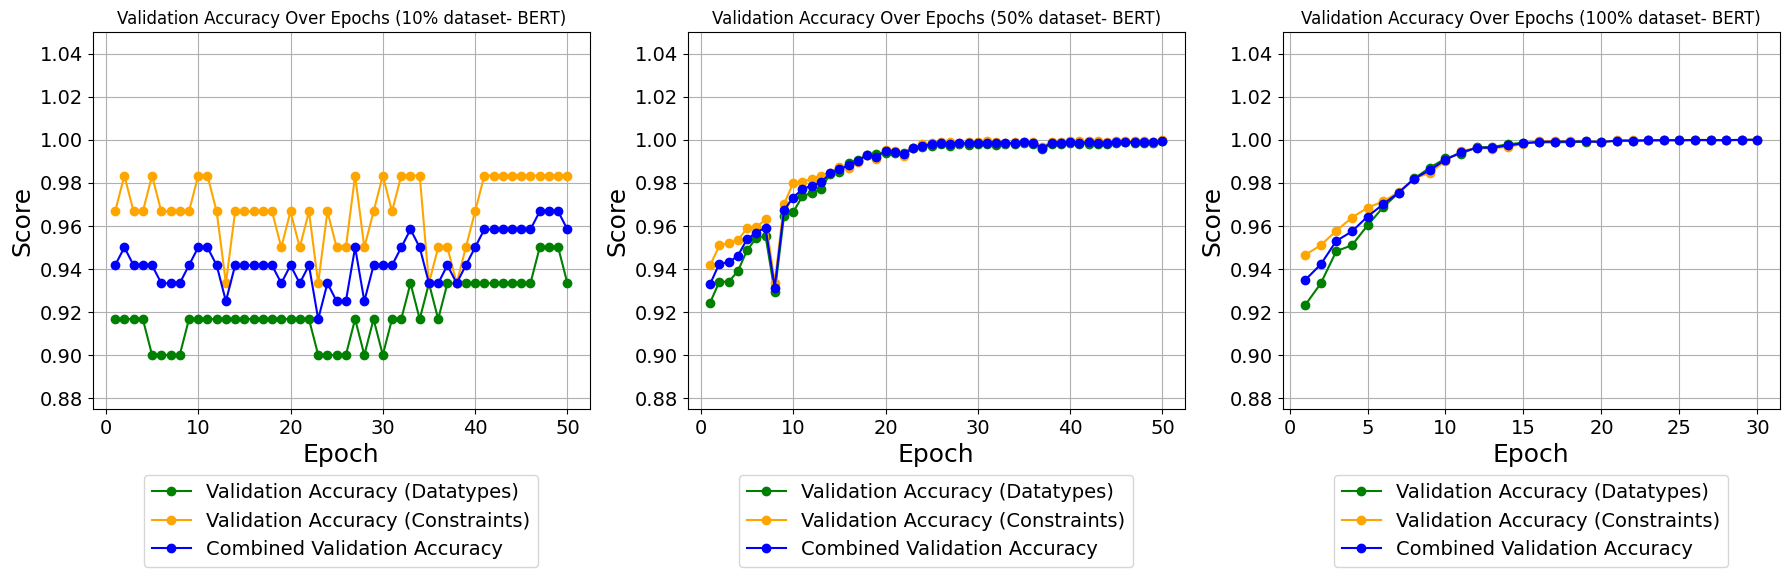

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the metrics from the saved CSV files
csv_files = [
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_new.csv',
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_medium.csv',
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_large.csv'
]

# Dataset sizes
dataset_sizes = ['10%', '50%', '100%']

# Create subplots for each CSV file
fig, axs = plt.subplots(1, len(csv_files), figsize=(18, 6))

for i, csv_path in enumerate(csv_files):
    metrics_df = pd.read_csv(csv_path)
    epochs = metrics_df['epoch'].tolist()
    val_accuracy_datatypes = metrics_df['val_accuracy_datatypes'].tolist()
    val_accuracy_constraints = metrics_df['val_accuracy_constraints'].tolist()
    combined_accuracy = [(d + c) / 2 for d, c in zip(val_accuracy_datatypes, val_accuracy_constraints)]

    axs[i].plot(epochs, val_accuracy_datatypes, marker='o', color='g', label='Validation Accuracy (Datatypes)')
    axs[i].plot(epochs, val_accuracy_constraints, marker='o', color='orange', label='Validation Accuracy (Constraints)')
    axs[i].plot(epochs, combined_accuracy, marker='o', color='b', label='Combined Validation Accuracy')
    axs[i].set_xlabel('Epoch', fontsize=18)
    axs[i].set_ylabel('Score', fontsize=18)
    axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=14)
    axs[i].set_title(f'Validation Accuracy Over Epochs ({dataset_sizes[i]} dataset- BERT)')
    # Set y-axis limits (adjust as needed)
    axs[i].set_ylim(0.875, 1.05)
    axs[i].grid(True)

plt.tight_layout()
plt.show()


# BERT Model - Plots and calculations for BERT model ( Precision and Recall)

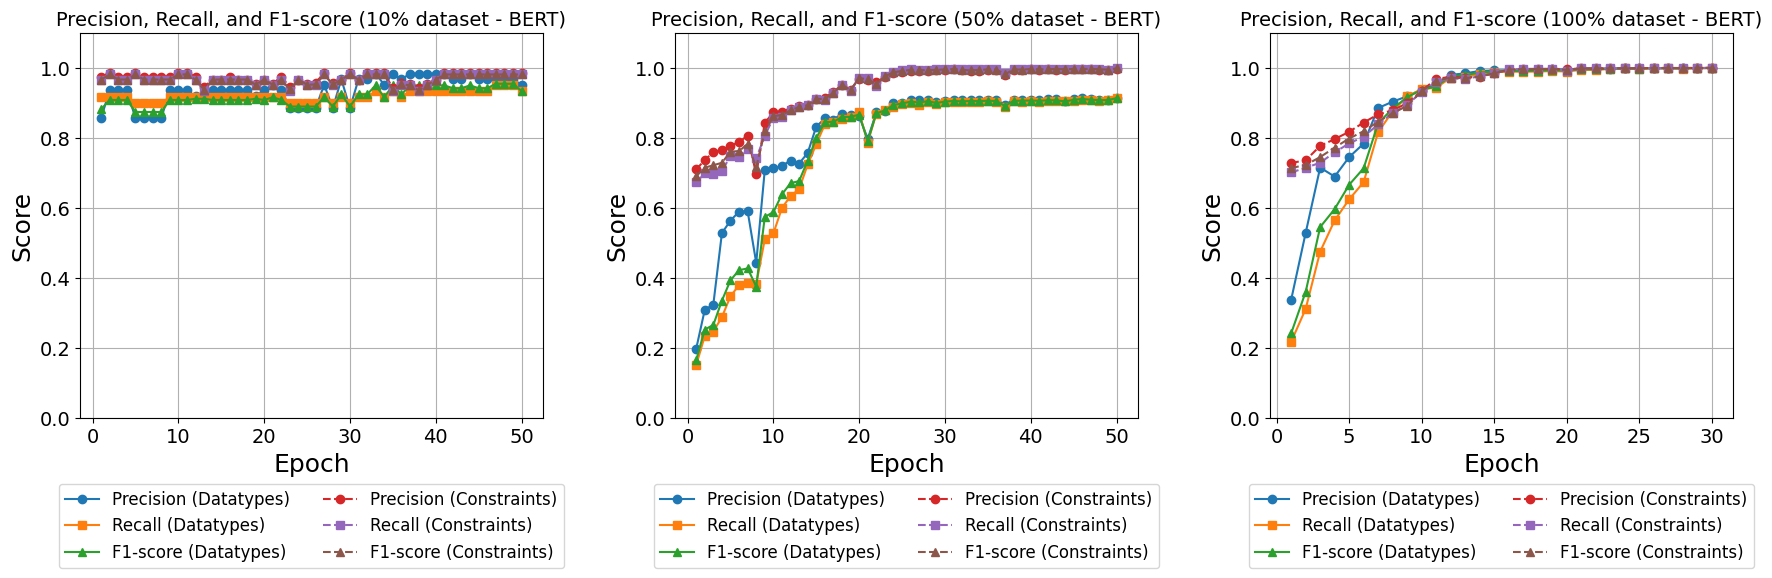

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define the directory where your CSV files are located
csv_directory = Path('/content/drive/MyDrive/Colab Notebooks/Bert/')

# Get a list of all CSV files in the directory
csv_files = [
    csv_directory / 'metrics_df_bert_new.csv',
    csv_directory / 'metrics_df_bert_medium.csv',
    csv_directory / 'metrics_df_bert_large.csv'
]

# Create subplots for each CSV file
fig, axs = plt.subplots(1, len(csv_files), figsize=(18, 6))

# Dataset labels
dataset_labels = ['10%', '50%', '100%']

for i, csv_path in enumerate(csv_files):
    df = pd.read_csv(csv_path)
    epochs = df['epoch'].tolist()

    # Datatypes metrics
    val_precision_datatypes = df['val_precision_datatypes'].tolist()
    val_recall_datatypes = df['val_recall_datatypes'].tolist()
    val_f1_datatypes = df['val_f1_datatypes'].tolist()

    # Constraints metrics
    val_precision_constraints = df['val_precision_constraints'].tolist()
    val_recall_constraints = df['val_recall_constraints'].tolist()
    val_f1_constraints = df['val_f1_constraints'].tolist()

    # Plot precision, recall, and F1-score for datatypes
    axs[i].plot(epochs, val_precision_datatypes, marker='o', linestyle='-', label='Precision (Datatypes)')
    axs[i].plot(epochs, val_recall_datatypes, marker='s', linestyle='-', label='Recall (Datatypes)')
    axs[i].plot(epochs, val_f1_datatypes, marker='^', linestyle='-', label='F1-score (Datatypes)')

    # Plot precision, recall, and F1-score for constraints
    axs[i].plot(epochs, val_precision_constraints, marker='o', linestyle='--', label='Precision (Constraints)')
    axs[i].plot(epochs, val_recall_constraints, marker='s', linestyle='--', label='Recall (Constraints)')
    axs[i].plot(epochs, val_f1_constraints, marker='^', linestyle='--', label='F1-score (Constraints)')

    # Set labels and titles
    axs[i].set_xlabel('Epoch', fontsize=18)
    axs[i].set_ylabel('Score', fontsize=18)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=14, prop={'size': 12})
    axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[i].set_title(f'Precision, Recall, and F1-score ({dataset_labels[i]} dataset - BERT)', fontsize=14)
    axs[i].set_ylim(0, 1.1)
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# BERT Model - Mean F1 Score / Recall

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames (replace with your actual file paths)
csv_files = [
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_new.csv',
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_medium.csv',
    '/content/drive/MyDrive/Colab Notebooks/Bert/metrics_df_bert_large.csv'
]

# Initialize lists to store F1 scores and recalls
f1_scores = []
recalls = []

# Initialize dataset labels
dataset_labels = ['10%', '50%', '100%']

# Iterate through each CSV file
for i, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    f1_scores.extend(df[['val_f1_datatypes', 'val_f1_constraints']].values.flatten())
    recalls.extend(df[['val_recall_datatypes', 'val_recall_constraints']].values.flatten())

    # Calculate mean and standard deviation for F1 scores and recalls
    mean_f1 = sum(f1_scores) / len(f1_scores)
    std_f1 = pd.Series(f1_scores).std()

    mean_recall = sum(recalls) / len(recalls)
    std_recall = pd.Series(recalls).std()

    # Print the calculated summary statistics for the current dataset
    print(f"Dataset: {dataset_labels[i]}")
    print(f"Mean F1 Score: {mean_f1:.3f} ± {std_f1:.3f}")
    print(f"Mean Recall: {mean_recall:.3f} ± {std_recall:.3f}")
    print("-" * 30)

# Note: The above code will print the summary statistics for each dataset separately.


Dataset: 10%
Mean F1 Score: 0.942 ± 0.032
Mean Recall: 0.944 ± 0.028
------------------------------
Dataset: 50%
Mean F1 Score: 0.895 ± 0.138
Mean Recall: 0.891 ± 0.146
------------------------------
Dataset: 100%
Mean F1 Score: 0.898 ± 0.143
Mean Recall: 0.893 ± 0.152
------------------------------


# BERT Model- Confusion matrix for different sampling sizes for datatypes and constraints

NameError: name 'i' is not defined

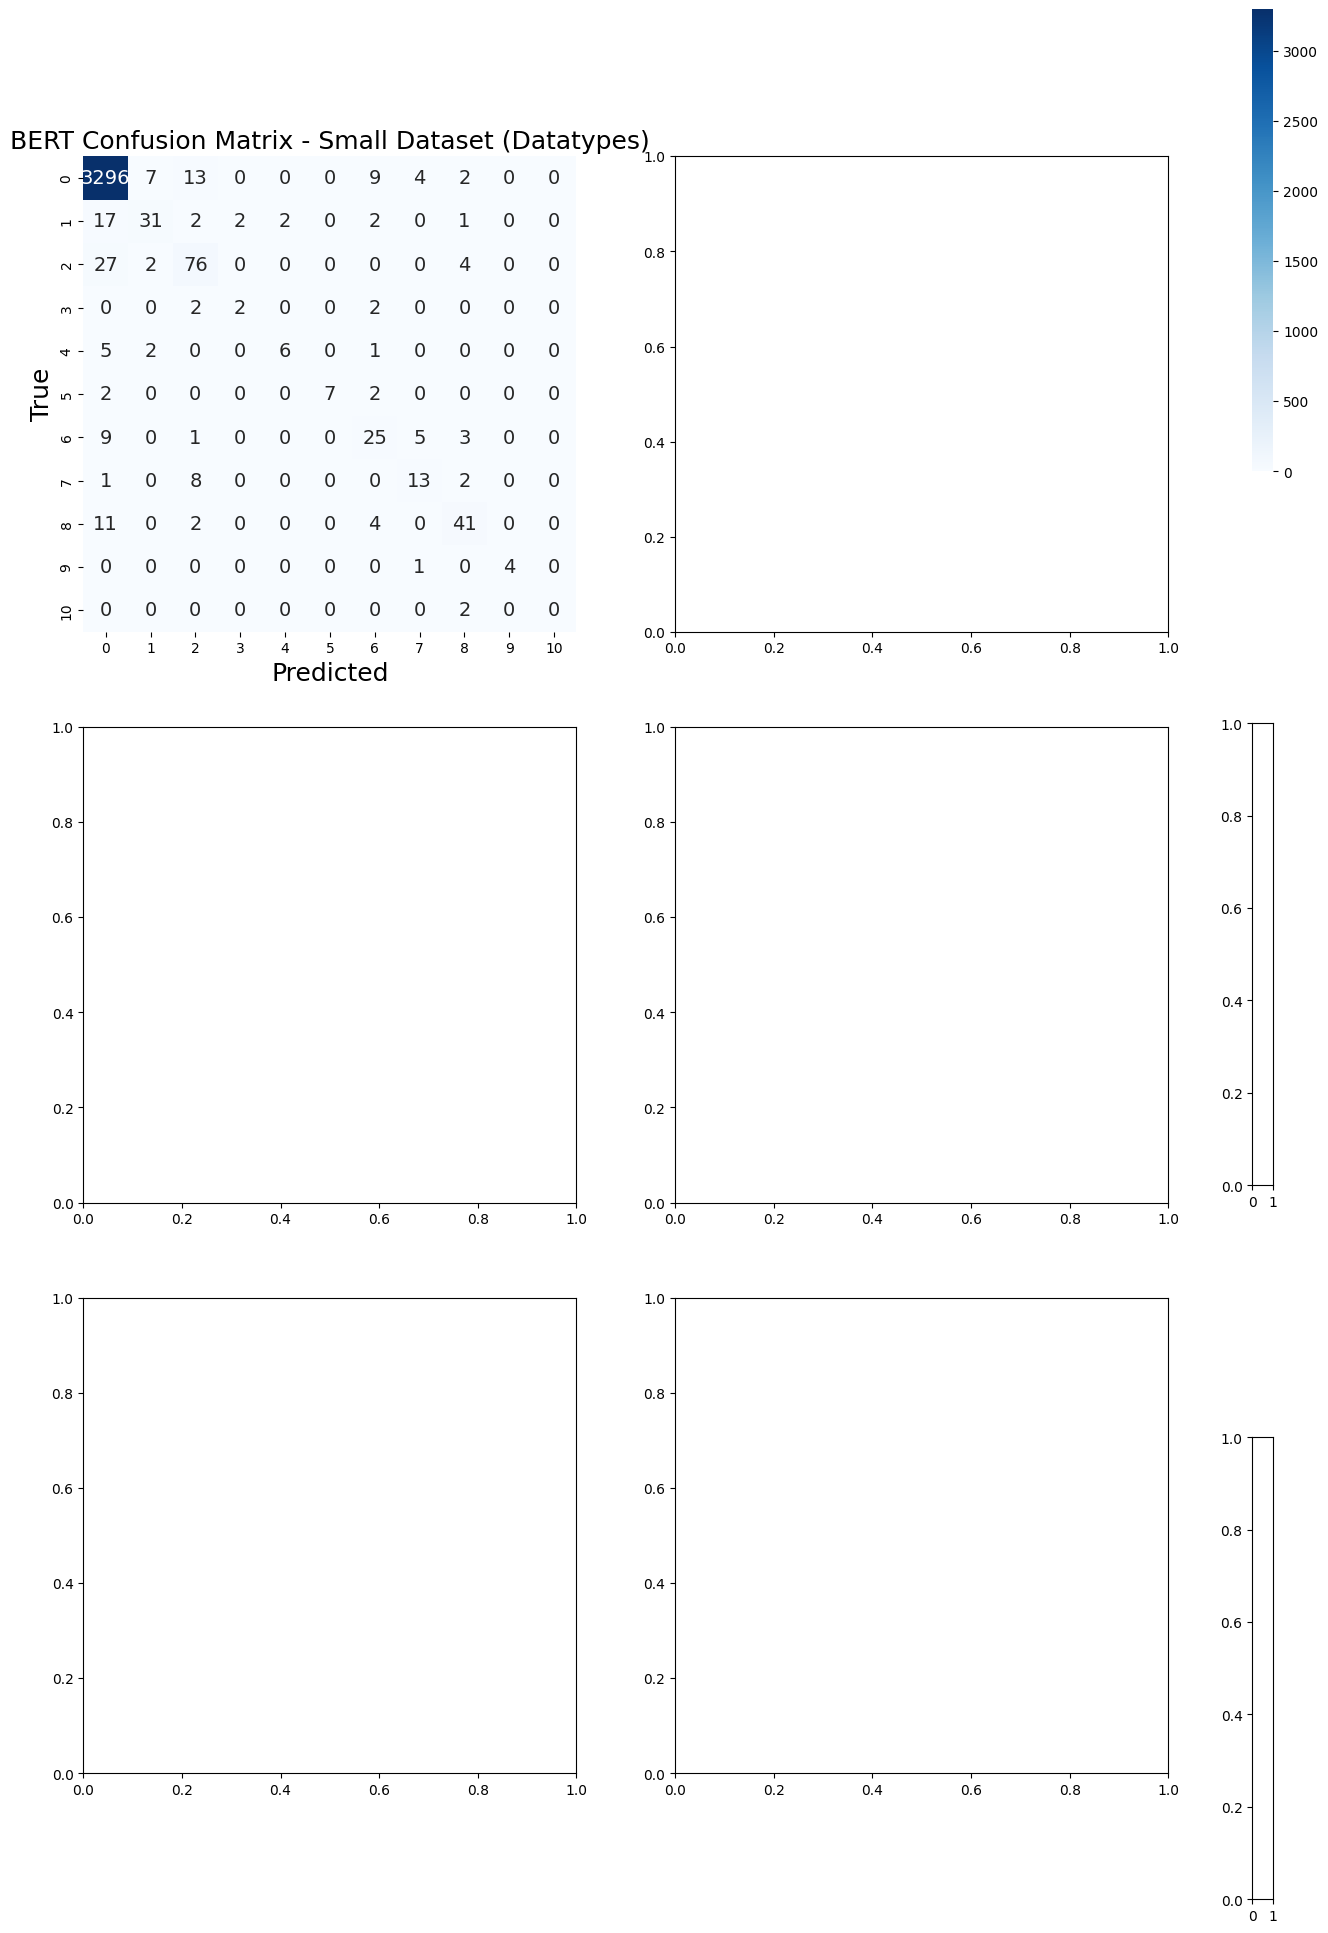

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the true and predicted labels from the JSON file for the small dataset
json_path_small = '/content/drive/MyDrive/Colab Notebooks/Bert/true_pred_labels_small.json'
with open(json_path_small, 'r') as f:
    true_pred_labels_small = json.load(f)

true_datatypes_small = true_pred_labels_small['true_datatypes']
pred_datatypes_small = true_pred_labels_small['pred_datatypes']
true_constraints_small = true_pred_labels_small['true_constraints']
pred_constraints_small = true_pred_labels_small['pred_constraints']

# Load the true and predicted labels from the JSON file for the medium dataset
json_path_medium = '/content/drive/MyDrive/Colab Notebooks/Bert/true_pred_labels_medium.json'
with open(json_path_medium, 'r') as f:
    true_pred_labels_medium = json.load(f)

true_datatypes_medium = true_pred_labels_medium['true_datatypes']
pred_datatypes_medium = true_pred_labels_medium['pred_datatypes']
true_constraints_medium = true_pred_labels_medium['true_constraints']
pred_constraints_medium = true_pred_labels_medium['pred_constraints']

# Load the true and predicted labels from the JSON file for the medium dataset
json_path_large = '/content/drive/MyDrive/Colab Notebooks/Bert/true_pred_labels_large.json'
with open(json_path_large, 'r') as f:
    true_pred_labels_large = json.load(f)

true_datatypes_large = true_pred_labels_large['true_datatypes']
pred_datatypes_large = true_pred_labels_large['pred_datatypes']
true_constraints_large = true_pred_labels_large['true_constraints']
pred_constraints_large = true_pred_labels_large['pred_constraints']

# Function to plot confusion matrix
def plot_confusion_matrix(ax,cbar_ax, true_labels, pred_labels, title):
    cm = confusion_matrix(true_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  cbar=True, cbar_ax=cbar_ax, ax=ax, annot_kws={"size": 14})
    ax.set_title(title, fontsize = 18)
    ax.set_xlabel('Predicted', fontsize = 18)
    ax.set_ylabel('True', fontsize = 18)
    axs[i].tick_params(axis='both', which='major', labelsize=14)

    # Add boundary around each plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Add boundary around each color bar
    for spine in cbar_ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)  # Adjust the linewidth as needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 21))

# Create an additional axis for the color bars
cbar_axes = [fig.add_axes([0.96, 0.73 - i*0.34, 0.015, 0.22]) for i in range(3)] #

# Plot confusion matrix for small dataset - datatypes
plot_confusion_matrix(axes[0, 0],cbar_axes[0], true_datatypes_small, pred_datatypes_small, title='BERT Confusion Matrix - Small Dataset (Datatypes)')

# Plot confusion matrix for small dataset - constraints
plot_confusion_matrix(axes[0, 1],cbar_axes[0], true_constraints_small, pred_constraints_small, title='BERT Confusion Matrix - Small Dataset (Constraints)')

# Plot confusion matrix for medium dataset - datatypes
plot_confusion_matrix(axes[1, 0],cbar_axes[1], true_datatypes_medium, pred_datatypes_medium, title='BERT Confusion Matrix - Medium Dataset (Datatypes)')

# Plot confusion matrix for medium dataset - constraints
plot_confusion_matrix(axes[1, 1],cbar_axes[1], true_constraints_medium, pred_constraints_medium, title='BERT Confusion Matrix - Medium Dataset (Constraints)')

# Plot confusion matrix for medium dataset - datatypes
plot_confusion_matrix(axes[2, 0],cbar_axes[2], true_datatypes_large, pred_datatypes_large, title='BERT Confusion Matrix - Large Dataset (Datatypes)')

# Plot confusion matrix for medium dataset - constraints
plot_confusion_matrix(axes[2, 1],cbar_axes[2], true_constraints_large, pred_constraints_large, title='BERT Confusion Matrix - Large Dataset (Constraints)')

# Adjust layout manually
plt.subplots_adjust(left=0.05, right=0.92, top=0.95, bottom=0.05, wspace=0.5, hspace=0.6)

plt.show()

# Iterate over each dataset and plot confusion matrices
for idx, (key, json_path) in enumerate(json_paths.items()):
    data = load_json_data(json_path)

    true_datatypes = data['true_datatypes']
    pred_datatypes = data['pred_datatypes']
    true_constraints = data['true_constraints']
    pred_constraints = data['pred_constraints']

    # Plot confusion matrix for datatypes
    plot_confusion_matrix(axes[idx, 0], cbar_axes[idx], true_datatypes, pred_datatypes, title=f'T5-Small Confusion Matrix - {key.capitalize()} Dataset (Datatypes)')

    # Plot confusion matrix for constraints
    plot_confusion_matrix(axes[idx, 1], cbar_axes[idx], true_constraints, pred_constraints, title=f'T5-Small Confusion Matrix - {key.capitalize()} Dataset (Constraints)')

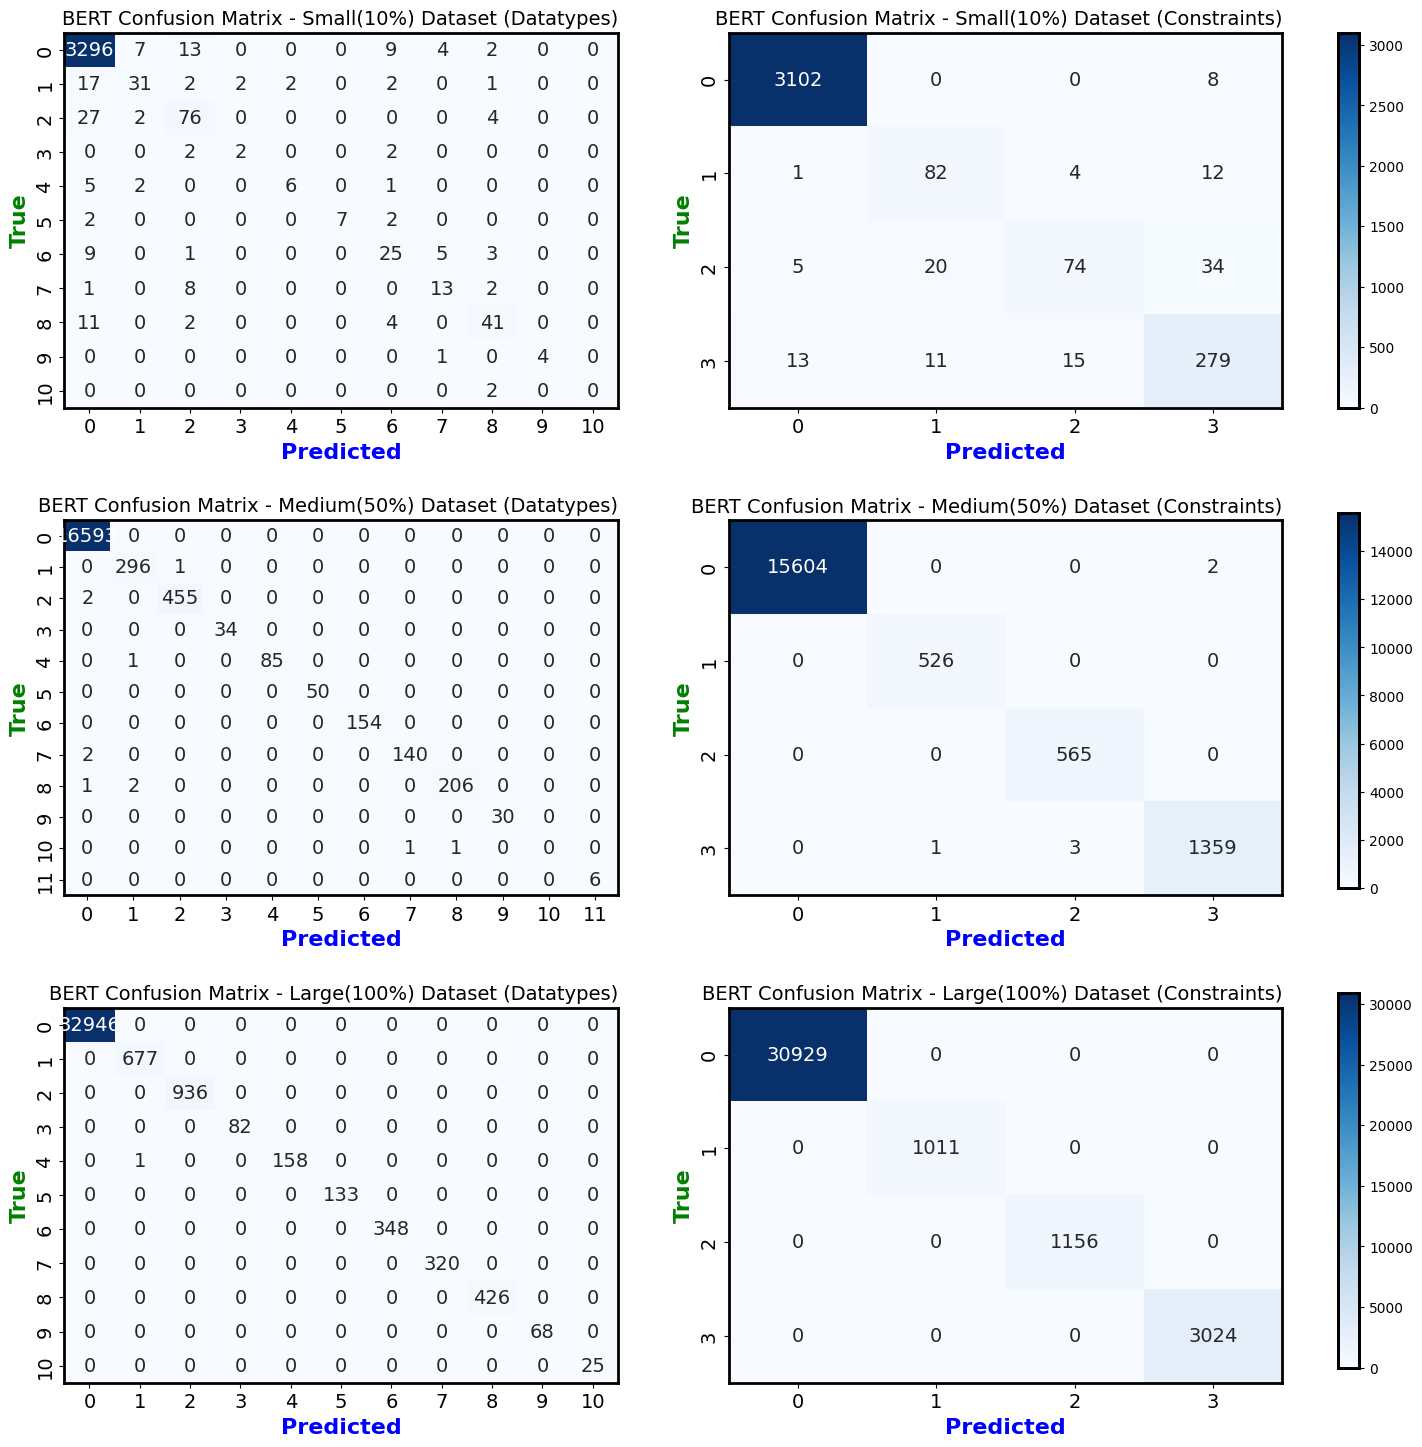

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to load JSON data
def load_json_data(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

# Paths to the JSON files
json_paths = {
    'small(10%)': '/content/drive/MyDrive/Colab Notebooks/Bert/true_pred_labels_small.json',
    'medium(50%)': '/content/drive/MyDrive/Colab Notebooks/Bert/true_pred_labels_medium.json',
    'large(100%)': '/content/drive/MyDrive/Colab Notebooks/Bert/true_pred_labels_large.json'
}

# Function to plot confusion matrix
def plot_confusion_matrix(ax, cbar_ax, true_labels, pred_labels, title):
    cm = confusion_matrix(true_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, cbar_ax=cbar_ax, ax=ax, annot_kws={"size": 14})
    ax.set_title(title, fontsize=14, loc = 'right')
    ax.set_xlabel('Predicted', fontsize=16, color='blue', fontweight='bold')
    ax.set_ylabel('True', fontsize=16, color='green', fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Add boundary around each plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Add boundary around each color bar
    for spine in cbar_ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)  # Adjust the linewidth as needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Create an additional axis for the color bars
cbar_axes = [fig.add_axes([0.96, 0.7 - i*0.32, 0.015, 0.25]) for i in range(3)]

# Iterate over each dataset and plot confusion matrices
for idx, (key, json_path) in enumerate(json_paths.items()):
    data = load_json_data(json_path)

    true_datatypes = data['true_datatypes']
    pred_datatypes = data['pred_datatypes']
    true_constraints = data['true_constraints']
    pred_constraints = data['pred_constraints']

    # Plot confusion matrix for datatypes
    plot_confusion_matrix(axes[idx, 0], cbar_axes[idx], true_datatypes, pred_datatypes, title=f'BERT Confusion Matrix - {key.capitalize()} Dataset (Datatypes)')

    # Plot confusion matrix for constraints
    plot_confusion_matrix(axes[idx, 1], cbar_axes[idx], true_constraints, pred_constraints, title=f'BERT Confusion Matrix - {key.capitalize()} Dataset (Constraints)')

# Adjust layout manually
plt.subplots_adjust(left=0.05, right=0.92, top=0.95, bottom=0.05, wspace=0.2, hspace=0.3)
#plt.tight_layout()
plt.show()


#  T5 small Model : Training and Validation Loss Over Epochs

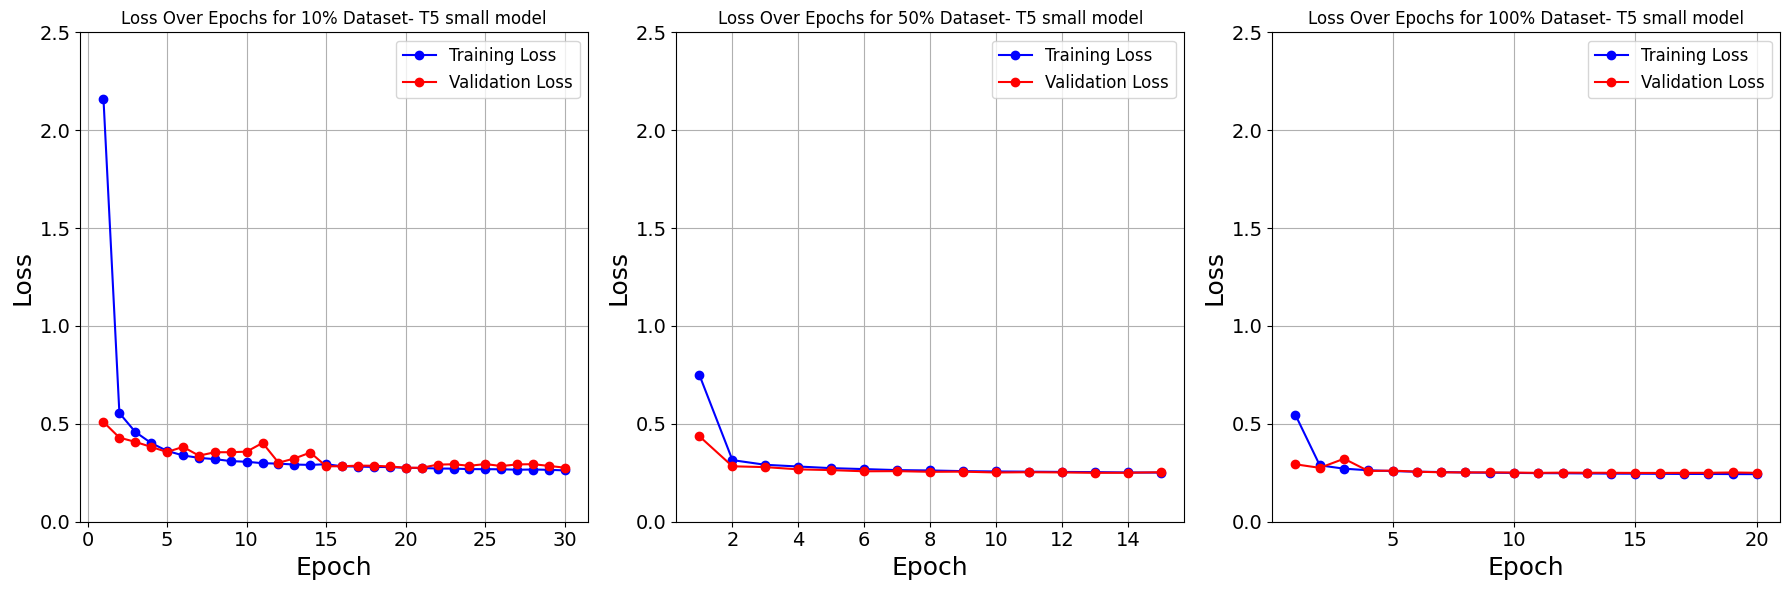

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the metrics from the saved CSV files
csv_files = ['/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling10_btc8.csv',
             '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling50.csv',
             '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling100.csv']

# Dataset sizes
dataset_sizes = ['10%', '50%', '100%']

# Create subplots for each CSV file
fig, axs = plt.subplots(1, len(csv_files), figsize=(18, 6))

for i, csv_path in enumerate(csv_files):
    metrics_df = pd.read_csv(csv_path)
    epochs = metrics_df['epoch'].tolist()
    train_loss_values = metrics_df['train_loss'].tolist()
    val_loss_values = metrics_df['val_loss'].tolist()

    axs[i].plot(epochs, train_loss_values, marker='o', color='blue', label='Training Loss')
    axs[i].plot(epochs, val_loss_values, marker='o', color='red', label='Validation Loss')
    axs[i].set_title(f'Loss Over Epochs for {dataset_sizes[i]} Dataset- T5 small model')
    axs[i].set_xlabel('Epoch', fontsize = 18)
    axs[i].set_ylabel('Loss', fontsize = 18)
    axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[i].set_ylim(0, 2.5)
    axs[i].grid(True)
    axs[i].legend(fontsize=12)

plt.tight_layout()
plt.show()

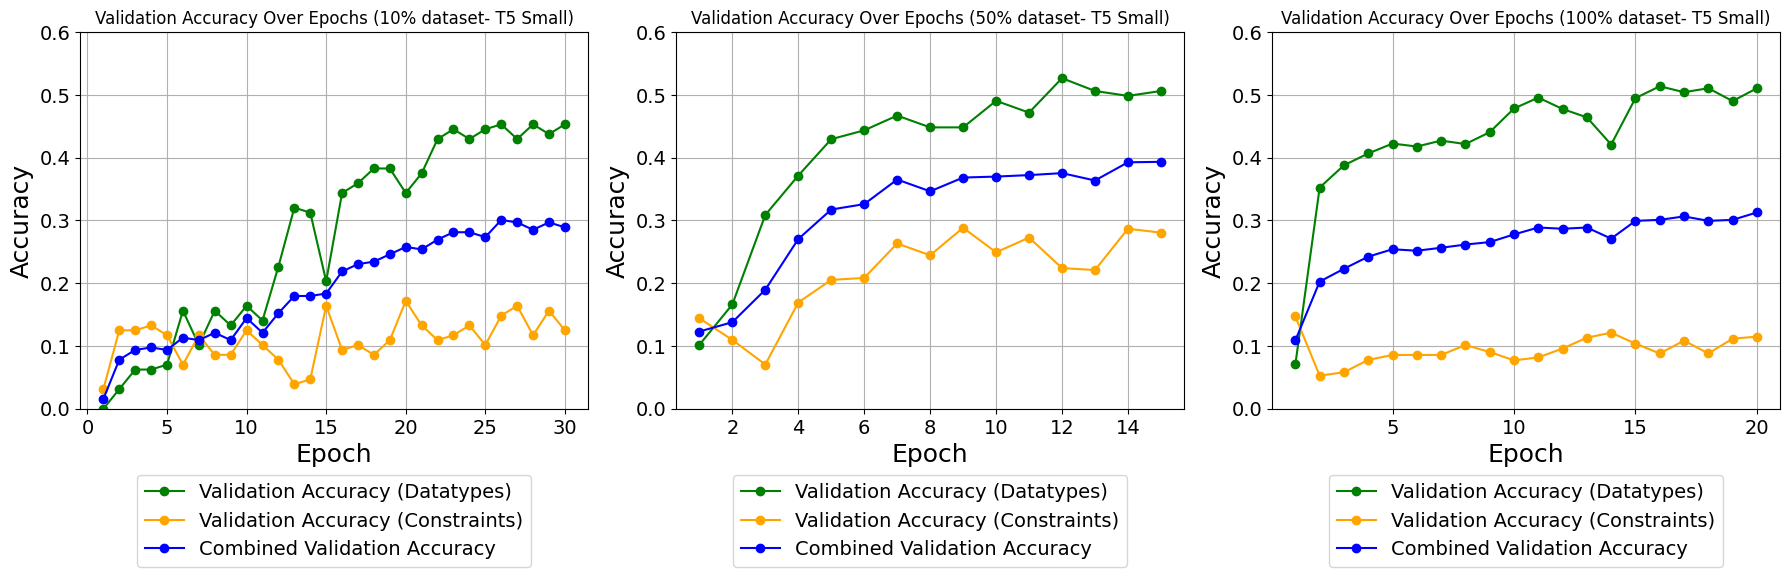

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the metrics from the saved CSV files
csv_files = [
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling10_btc8.csv',
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling50.csv',
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling100.csv'
]

# Dataset sizes
dataset_sizes = ['10%', '50%', '100%']

# Create subplots for each CSV file
fig, axs = plt.subplots(1, len(csv_files), figsize=(18, 6))

for i, csv_path in enumerate(csv_files):
    metrics_df = pd.read_csv(csv_path)
    epochs = metrics_df['epoch'].tolist()
    val_accuracy_datatypes = metrics_df['val_accuracy_datatypes'].tolist()
    val_accuracy_constraints = metrics_df['val_accuracy_constraints'].tolist()
    combined_accuracy = [(d + c) / 2 for d, c in zip(val_accuracy_datatypes, val_accuracy_constraints)]

    axs[i].plot(epochs, val_accuracy_datatypes, marker='o', color='g', label='Validation Accuracy (Datatypes)')
    axs[i].plot(epochs, val_accuracy_constraints, marker='o', color='orange', label='Validation Accuracy (Constraints)')
    axs[i].plot(epochs, combined_accuracy, marker='o', color='b', label='Combined Validation Accuracy')
    axs[i].set_xlabel('Epoch', fontsize = 18)
    axs[i].set_ylabel('Accuracy', fontsize = 18)
    axs[i].set_title(f'Validation Accuracy Over Epochs ({dataset_sizes[i]} dataset- T5 Small)')
    axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[i].set_ylim(0, 0.6)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=14)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Plots and calculations for T5 Small model ( Precision and Recall)

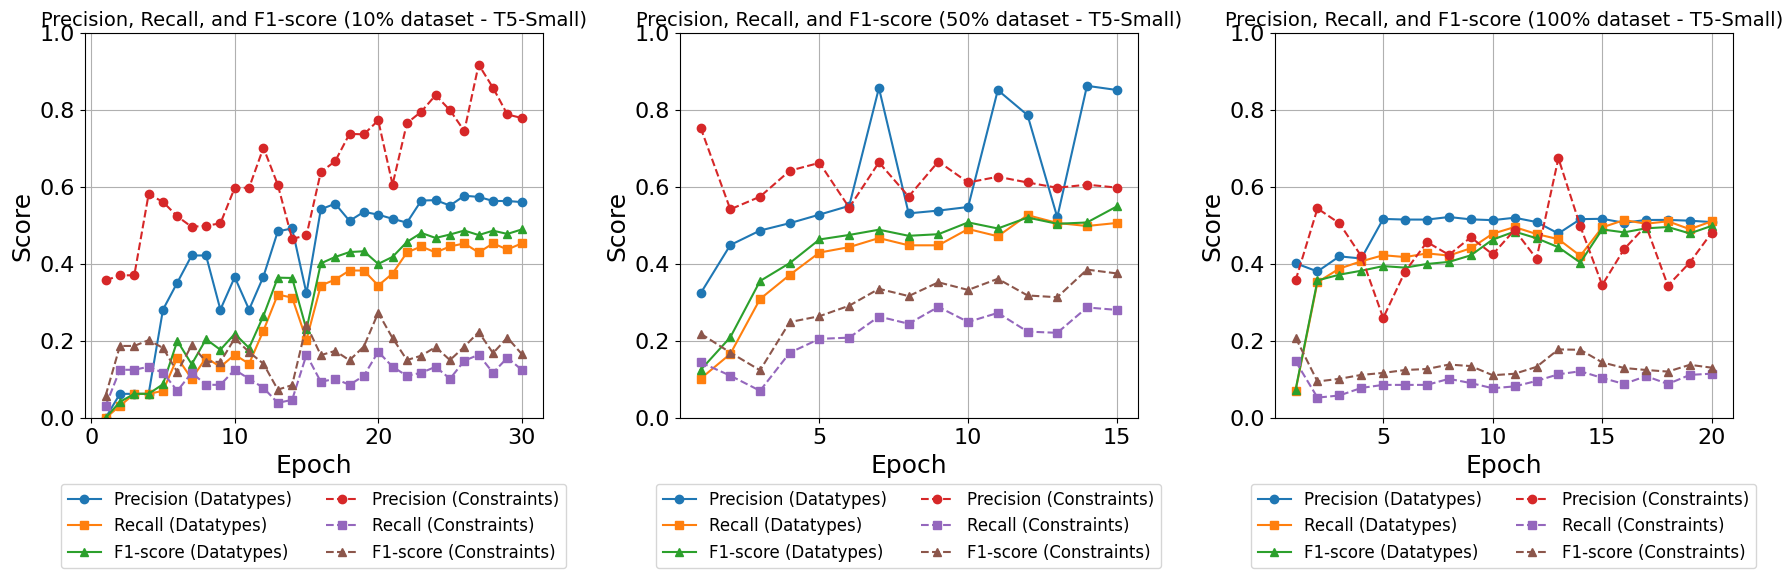

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling10_btc8.csv',
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling50.csv',
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling100.csv'
]

dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Dataset labels
dataset_labels = ['10%', '50%', '100%']

# Create a single figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Loop over the dataframes and plot the metrics
for i, df in enumerate(dfs):
    epochs = df['epoch'].tolist()

    # Datatypes metrics
    val_precision_datatypes = df['val_precision_datatypes'].tolist()
    val_recall_datatypes = df['val_recall_datatypes'].tolist()
    val_f1_datatypes = df['val_f1_datatypes'].tolist()

    # Constraints metrics
    val_precision_constraints = df['val_precision_constraints'].tolist()
    val_recall_constraints = df['val_recall_constraints'].tolist()
    val_f1_constraints = df['val_f1_constraints'].tolist()

    # Plot precision, recall, and F1-score for datatypes
    axs[i].plot(epochs, val_precision_datatypes, marker='o', linestyle='-', label=f'Precision (Datatypes)')
    axs[i].plot(epochs, val_recall_datatypes, marker='s', linestyle='-', label=f'Recall (Datatypes)')
    axs[i].plot(epochs, val_f1_datatypes, marker='^', linestyle='-', label=f'F1-score (Datatypes)')

    # Plot precision, recall, and F1-score for constraints
    axs[i].plot(epochs, val_precision_constraints, marker='o', linestyle='--', label=f'Precision (Constraints)')
    axs[i].plot(epochs, val_recall_constraints, marker='s', linestyle='--', label=f'Recall (Constraints)')
    axs[i].plot(epochs, val_f1_constraints, marker='^', linestyle='--', label=f'F1-score (Constraints)')

    # Set labels and titles
    axs[i].set_xlabel('Epoch', fontsize=18)
    axs[i].set_ylabel('Score', fontsize=18)
    axs[i].set_title(f'Precision, Recall, and F1-score ({dataset_labels[i]} dataset - T5-Small)', fontsize=14)
    axs[i].set_ylim(0, 1)
    axs[i].tick_params(axis='both', which='major', labelsize=16)
    axs[i].grid(True)
    axs[i].legend(loc='upper center', fontsize=14, bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 12})

# Adjust layout
plt.tight_layout()
plt.show()


# T5- Small Confusion Matrix

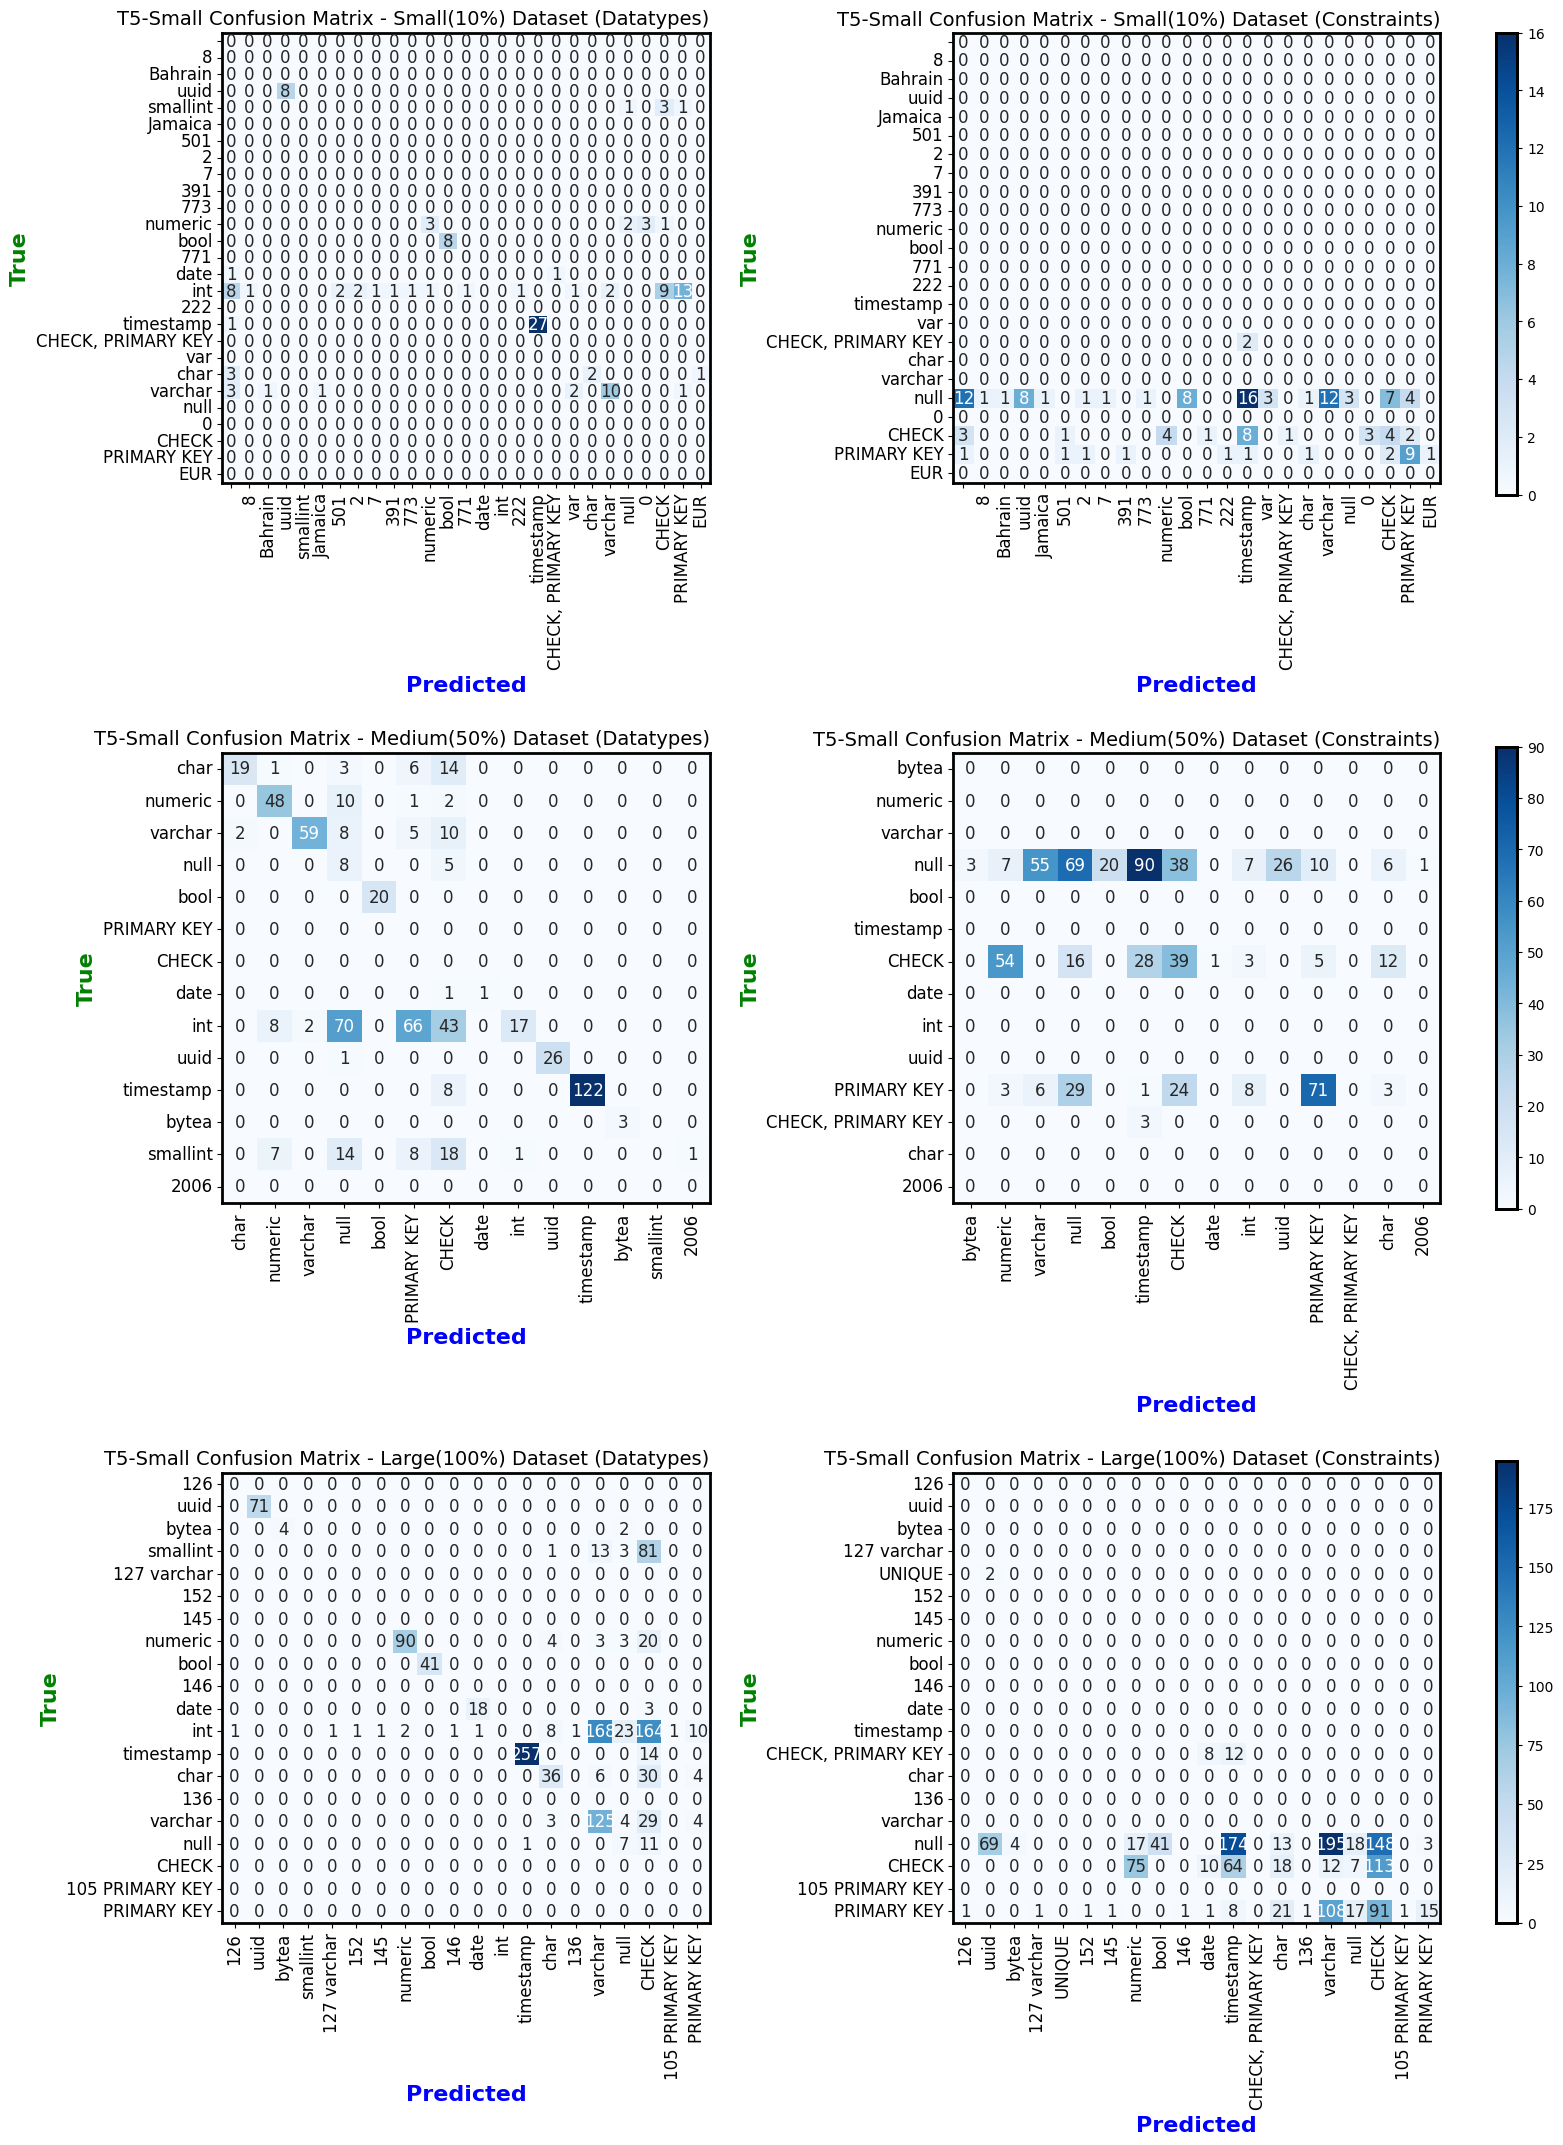

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to load JSON data
def load_json_data(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

# Paths to the JSON files
json_paths = {
    'small(10%)': '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/true_pred_labels_sampling10_btc8.json',
    'medium(50%)': '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/true_pred_labels_sampling50.json',
    'large(100%)': '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/true_pred_labels_sampling100.json'
}

# Function to plot confusion matrix
def plot_confusion_matrix(ax, cbar_ax, true_labels, pred_labels, title):
    cm = confusion_matrix(true_labels, pred_labels, labels=list(set(true_labels + pred_labels)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, cbar_ax=cbar_ax, ax=ax, xticklabels=list(set(true_labels + pred_labels)), yticklabels=list(set(true_labels + pred_labels)), annot_kws={"size": 12})
    ax.set_title(title, fontsize=14, loc = 'right')
    ax.set_xlabel('Predicted', fontsize=16, color='blue', fontweight='bold')
    ax.set_ylabel('True', fontsize=16, color='green', fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Add boundary around each plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Add boundary around each color bar
    for spine in cbar_ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)  # Adjust the linewidth as needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 21))

# Create an additional axis for the color bars
cbar_axes = [fig.add_axes([0.96, 0.73 - i*0.34, 0.015, 0.22]) for i in range(3)] #

# Iterate over each dataset and plot confusion matrices
for idx, (key, json_path) in enumerate(json_paths.items()):
    data = load_json_data(json_path)

    true_datatypes = data['true_datatypes']
    pred_datatypes = data['pred_datatypes']
    true_constraints = data['true_constraints']
    pred_constraints = data['pred_constraints']

    # Plot confusion matrix for datatypes
    plot_confusion_matrix(axes[idx, 0], cbar_axes[idx], true_datatypes, pred_datatypes, title=f'T5-Small Confusion Matrix - {key.capitalize()} Dataset (Datatypes)')

    # Plot confusion matrix for constraints
    plot_confusion_matrix(axes[idx, 1], cbar_axes[idx], true_constraints, pred_constraints, title=f'T5-Small Confusion Matrix - {key.capitalize()} Dataset (Constraints)')

# Adjust layout manually
plt.subplots_adjust(left=0.05, right=0.92, top=0.95, bottom=0.05, wspace=0.5, hspace=0.6)

plt.show()


# Mean, F1-Scores for T5 small

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames (replace with your actual file paths)
csv_files = [
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling10_btc8.csv',
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling50.csv',
    '/content/drive/MyDrive/Colab Notebooks/Evaluation/T5/t5small_sampling100.csv'
]

# Initialize lists to store F1 scores and recalls
f1_scores = []
recalls = []

# Initialize dataset labels
dataset_labels = ['10%', '50%', '100%']

# Iterate through each CSV file
for i, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    f1_scores.extend(df[['val_f1_datatypes', 'val_f1_constraints']].values.flatten())
    recalls.extend(df[['val_recall_datatypes', 'val_recall_constraints']].values.flatten())

    # Calculate mean and standard deviation for F1 scores and recalls
    mean_f1 = sum(f1_scores) / len(f1_scores)
    std_f1 = pd.Series(f1_scores).std()

    mean_recall = sum(recalls) / len(recalls)
    std_recall = pd.Series(recalls).std()

    # Print the calculated summary statistics for the current dataset
    print(f"Dataset: {dataset_labels[i]}")
    print(f"Mean F1 Score: {mean_f1:.3f} ± {std_f1:.3f}")
    print(f"Mean Recall: {mean_recall:.3f} ± {std_recall:.3f}")
    print("-" * 30)

Dataset: 10%
Mean F1 Score: 0.241 ± 0.139
Mean Recall: 0.194 ± 0.139
------------------------------
Dataset: 50%
Mean F1 Score: 0.283 ± 0.146
Mean Recall: 0.234 ± 0.150
------------------------------
Dataset: 100%
Mean F1 Score: 0.281 ± 0.150
Mean Recall: 0.243 ± 0.162
------------------------------


# BERT baseline model testing on test data records

In [ ]:
import logging
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import classification_report, confusion_matrix

# Set up logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Example test data
test_data = [
    "188,8,3,2009-12-10,2009-12-09 00:00:00",
    "2,856,d13454cf-c86f-4404-9c77-53be883e94df,2012-05-02 00:00:00",
    "37,777,17,1,2012-07-04 00:00:00,2012-07-20 00:00:00,2012-07-15 00:00:00,,2012-07-20 00:00:00",
]

true_labels = [
    ["int", "int", "int", "date", "timestamp"],
    ["int", "int", "uuid", "timestamp"],
    ["int", "int", "int", "int", "timestamp", "timestamp", "timestamp", "null", "timestamp"]
]

# Initialize the BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Tokenize the test data
inputs = tokenizer(test_data, return_tensors="pt", padding=True, truncation=True)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get predictions
predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()

# Map predicted labels to schema types (for the example, assume a predefined map)
label_map = {0: "int", 1: "date", 2: "timestamp", 3: "uuid", 4: "varchar"}
predicted_schema = [label_map[label] for label in predicted_labels]

# Evaluate the results
true_flat = [item for sublist in true_labels for item in sublist]
pred_flat = [predicted_schema[i] for i, sublist in enumerate(true_labels) for _ in sublist]

print("Classification Report:")
print(classification_report(true_flat, pred_flat, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(true_flat, pred_flat))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classification Report:
              precision    recall  f1-score   support

        date       0.06      1.00      0.11         1
         int       0.00      0.00      0.00         9
        null       0.00      0.00      0.00         1
   timestamp       0.00      0.00      0.00         6
        uuid       0.00      0.00      0.00         1

    accuracy                           0.06        18
   macro avg       0.01      0.20      0.02        18
weighted avg       0.00      0.06      0.01        18

Confusion Matrix:
[[1 0 0 0 0]
 [9 0 0 0 0]
 [1 0 0 0 0]
 [6 0 0 0 0]
 [1 0 0 0 0]]


# T5 small baseline model testing on test records

In [ ]:
import logging
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
from sklearn.metrics import classification_report, confusion_matrix

# Set up logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Example test data
test_data = [
    "188,8,3,2009-12-10,2009-12-09 00:00:00",
    "2,856,d13454cf-c86f-4404-9c77-53be883e94df,2012-05-02 00:00:00",
    "37,777,17,1,2012-07-04 00:00:00,2012-07-20 00:00:00,2012-07-15 00:00:00,,2012-07-20 00:00:00",
]

# True labels (for demonstration purposes, these should be the true schema types for the test data)
true_labels = [
    ["int", "int", "int", "date", "timestamp"],
    ["int", "int", "uuid", "timestamp"],
    ["int", "int", "int", "int", "timestamp", "timestamp", "timestamp", "null", "timestamp"]
]

# Initialize the T5 tokenizer and model
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Define a function to generate predictions using T5
def generate_schema_predictions(inputs):
    input_text = " ".join(inputs)
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    outputs = model.generate(input_ids, max_length=50)
    pred_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return pred_text.split()

# Get predictions
predicted_schema = [generate_schema_predictions(data.split(",")) for data in test_data]

# Ensure lengths of true labels and predicted labels are the same
true_flat = [item for sublist in true_labels for item in sublist]
pred_flat = []
for true_label, pred_list in zip(true_labels, predicted_schema):
    for true_item in true_label:
        if pred_list:
            pred_flat.append(pred_list.pop(0))
        else:
            pred_flat.append("")

# Calculate metrics
print("Classification Report:")
print(classification_report(true_flat, pred_flat))

print("Confusion Matrix:")
print(confusion_matrix(true_flat, pred_flat))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Classification Report:
              precision    recall  f1-score   support

                   0.00      0.00      0.00       0.0
    00:00:00       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
  2009-12-09       0.00      0.00      0.00       0.0
  2009-12-10       0.00      0.00      0.00       0.0
  2012-05-02       0.00      0.00      0.00       0.0
  2012-07-04       0.00      0.00      0.00       0.0
  2012-07-15       0.00      0.00      0.00       0.0
  2012-07-20       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       0.0
         777       0.00      0.00      0.00       0.0
        date       0.00      0.00      0.00       1.0
         int       0.00      0.00      0.00       9.0
        null       0.00      0.00      0.00       1.0
   timestamp       0.00      0.00      0.00       6.0
        uuid       0.00      0.00      0.00       1.0

   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# Comparison Plot of baseline model testing

<ipython-input-56-20ef9830c899>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 1.2, 0.2).round(1), fontsize=18)


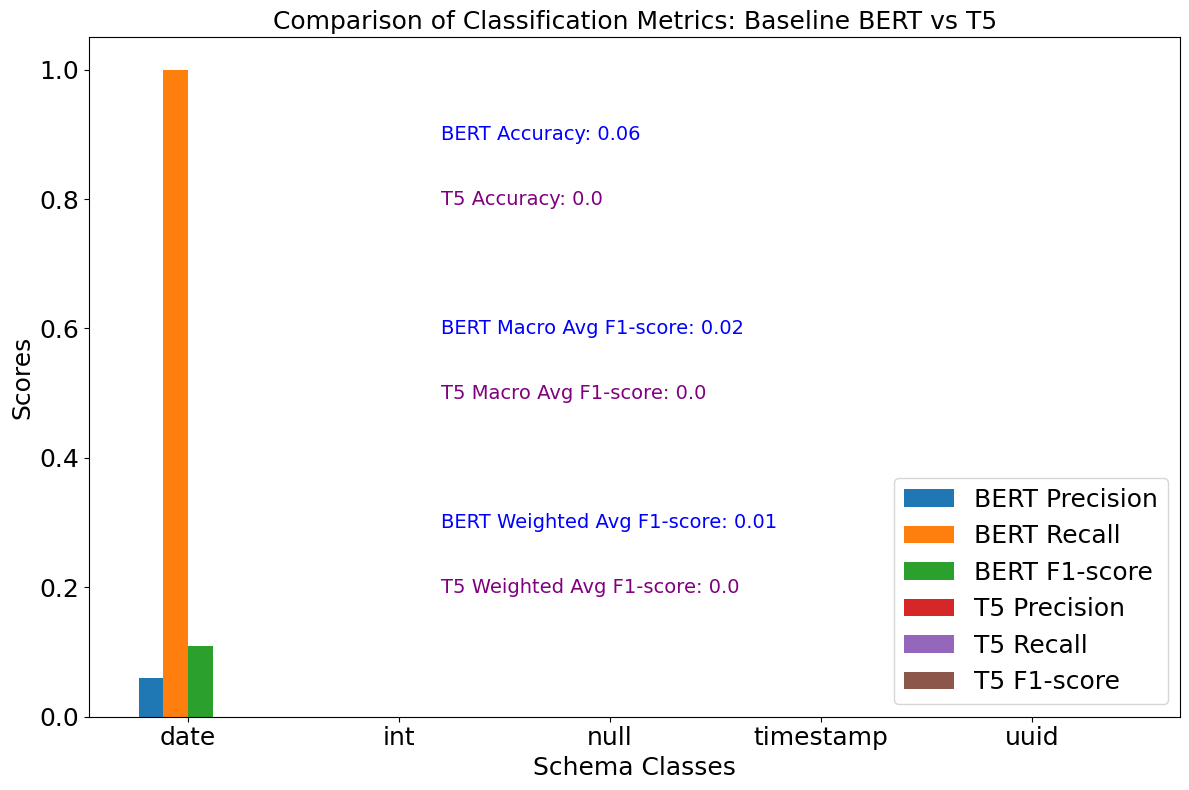

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for BERT and T5
bert_metrics = {
    'Precision': [0.06, 0.00, 0.00, 0.00, 0.00],
    'Recall': [1.00, 0.00, 0.00, 0.00, 0.00],
    'F1-score': [0.11, 0.00, 0.00, 0.00, 0.00],
    'Accuracy': 0.06,
    'Macro Avg': [0.01, 0.20, 0.02],
    'Weighted Avg': [0.00, 0.06, 0.01]
}

t5_metrics = {
    'Precision': [0.00, 0.00, 0.00, 0.00, 0.00],
    'Recall': [0.00, 0.00, 0.00, 0.00, 0.00],
    'F1-score': [0.00, 0.00, 0.00, 0.00, 0.00],
    'Accuracy': 0.00,
    'Macro Avg': [0.00, 0.00, 0.00],
    'Weighted Avg': [0.00, 0.00, 0.00]
}

# Schema classes
classes = ['date', 'int', 'null', 'timestamp', 'uuid']

x = np.arange(len(classes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plot BERT metrics
for i, metric_name in enumerate(['Precision', 'Recall', 'F1-score']):
    ax.bar(x - width/2 + i*width/3, bert_metrics[metric_name], width/3, label=f'BERT {metric_name}')

# Plot T5 metrics
for i, metric_name in enumerate(['Precision', 'Recall', 'F1-score']):
    ax.bar(x + width/2 + i*width/3, t5_metrics[metric_name], width/3, label=f'T5 {metric_name}')

# Add text annotations for accuracy, macro avg, weighted avg on the right side
text_x = 1.2  # x position for the annotations
text_y = 0.9  # initial y position for the annotations

ax.text(text_x, text_y, f'BERT Accuracy: {bert_metrics["Accuracy"]}', ha='left', va='center', fontsize=14, color='blue')
ax.text(text_x, text_y - 0.1, f'T5 Accuracy: {t5_metrics["Accuracy"]}', ha='left', va='center', fontsize=14, color='purple')

ax.text(text_x, text_y - 0.3, f'BERT Macro Avg F1-score: {bert_metrics["Macro Avg"][2]}', ha='left', va='center', fontsize=14, color='blue')
ax.text(text_x, text_y - 0.4, f'T5 Macro Avg F1-score: {t5_metrics["Macro Avg"][2]}', ha='left', va='center', fontsize=14, color='purple')

ax.text(text_x, text_y - 0.6, f'BERT Weighted Avg F1-score: {bert_metrics["Weighted Avg"][2]}', ha='left', va='center', fontsize=14, color='blue')
ax.text(text_x, text_y - 0.7, f'T5 Weighted Avg F1-score: {t5_metrics["Weighted Avg"][2]}', ha='left', va='center', fontsize=14, color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Schema Classes', fontsize=18)
ax.set_ylabel('Scores', fontsize=18)
ax.set_title('Comparison of Classification Metrics: Baseline BERT vs T5', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=18)
ax.set_yticklabels(np.arange(0, 1.2, 0.2).round(1), fontsize=18)
ax.legend(loc='lower right', fontsize=18)


fig.tight_layout()

plt.show()


In [ ]:
import logging
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Set up logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Example test data
test_data = [
    "188,8,3,2009-12-10,2009-12-09 00:00:00",
    "2,856,d13454cf-c86f-4404-9c77-53be883e94df,2012-05-02 00:00:00",
    "37,777,17,1,2012-07-04 00:00:00,2012-07-20 00:00:00,2012-07-15 00:00:00,,2012-07-20 00:00:00",
]

# Labels (not used for inference in this example)
labels = [0, 1, 2]

# Initialize the BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Tokenize the test data
inputs = tokenizer(test_data, return_tensors="pt", padding=True, truncation=True)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted probabilities and labels
predicted_probabilities = torch.softmax(outputs.logits, dim=1)
predicted_labels = torch.argmax(outputs.logits, dim=1)

# Print predictions (for demonstration)
for input_text, label in zip(test_data, predicted_labels):
    print(f"Input: {input_text}")
    print(f"Predicted Label: {label.item()}")
    print("-" * 50)

# Calculate evaluation metrics
true_labels = torch.tensor(labels)  # Dummy labels for demonstration
pred_labels = predicted_labels.tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, pred_labels)

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Save evaluation results to CSV
results_df = pd.DataFrame([{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}])
results_csv_path = "/content/drive/MyDrive/Colab Notebooks/bert_evaluation_results.csv"
results_df.to_csv(results_csv_path, index=False)

print(f"Evaluation results have been saved to {results_csv_path}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Input: 188,8,3,2009-12-10,2009-12-09 00:00:00
Predicted Label: 0
--------------------------------------------------
Input: 2,856,d13454cf-c86f-4404-9c77-53be883e94df,2012-05-02 00:00:00
Predicted Label: 0
--------------------------------------------------
Input: 37,777,17,1,2012-07-04 00:00:00,2012-07-20 00:00:00,2012-07-15 00:00:00,,2012-07-20 00:00:00
Predicted Label: 0
--------------------------------------------------
Accuracy: 0.3333
Precision: 0.1111
Recall: 0.3333
F1 Score: 0.1667
Evaluation results have been saved to /content/drive/MyDrive/Colab Notebooks/bert_evaluation_results.csv


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
